In [6]:
# https://towardsdatascience.com/predicting-the-future-with-facebook-s-prophet-bdfe11af10ff
# https://github.com/parulnith/Predicting-the-Future-with-Facebook-s-Prophet/blob/master/data/medium_stats.xlsx
# https://hub.mybinder.org/user/parulnith-predi-ebook-s-prophet-bxbt3vbn/notebooks/Forecasting%20Views%20for%20a%20Medium%20article%20using%20Prophet..ipynb

In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")# for pretty graphs
df = pd.read_excel('data/medium_stats.xlsx')
df.head()

,Date,Views
0,2018-07-02,21
1,2018-07-03,45
2,2018-07-04,31
3,2018-07-05,25
4,2018-07-06,31


In [4]:
df.dtypes

Date     datetime64[ns]
Views             int64
dtype: object

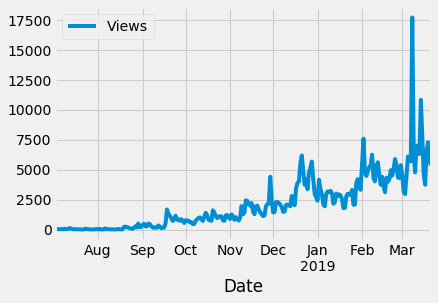

In [5]:
df.set_index('Date').plot()

In [8]:
df = df[df['Views']<10000]

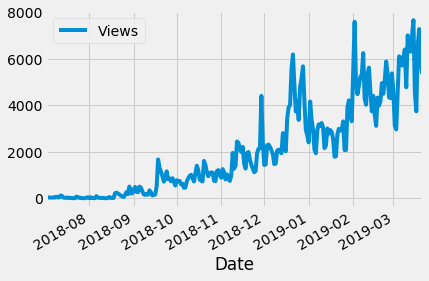

In [9]:
df.set_index('Date').plot()

In [11]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2018-07-02,21
1,2018-07-03,45
2,2018-07-04,31
3,2018-07-05,25
4,2018-07-06,31


In [12]:
m1 = Prophet(daily_seasonality=True)
m1.fit(df)

/Users/sulbha/anaconda/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [15]:
future1 = m1.make_future_dataframe(periods=60)
forecast1 = m1.predict(future1)
forecast1.tail().T

,316,317,318,319,320
ds,2019-05-16 00:00:00,2019-05-17 00:00:00,2019-05-18 00:00:00,2019-05-19 00:00:00,2019-05-20 00:00:00
trend,7692.69,7723.77,7754.85,7785.94,7817.02
yhat_lower,6449.05,6669.67,6239.75,6035.68,6582.57
yhat_upper,8371.83,8573.86,8226.62,7966.32,8574.02
trend_lower,7608.99,7636.97,7667.45,7696.45,7725.31
trend_upper,7778.43,7811.68,7844.75,7878.09,7911.17
additive_terms,-258.957,-146.579,-552.158,-783.46,-251.743
additive_terms_lower,-258.957,-146.579,-552.158,-783.46,-251.743
additive_terms_upper,-258.957,-146.579,-552.158,-783.46,-251.743
daily,-356.509,-356.509,-356.509,-356.509,-356.509


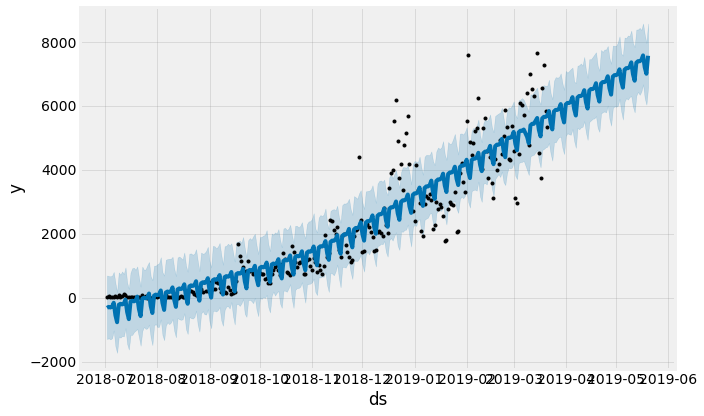

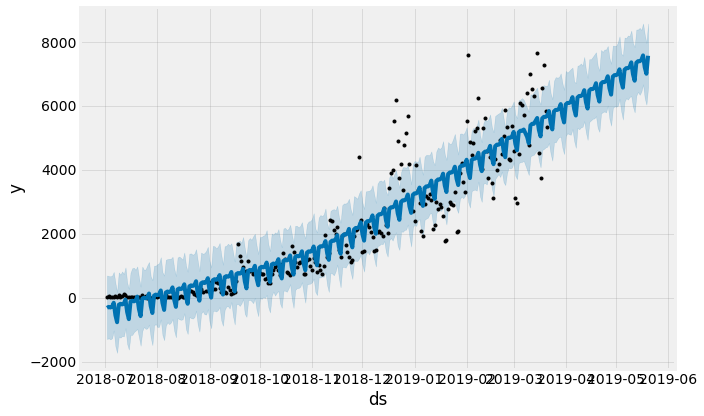

In [17]:
m1.plot(forecast1)

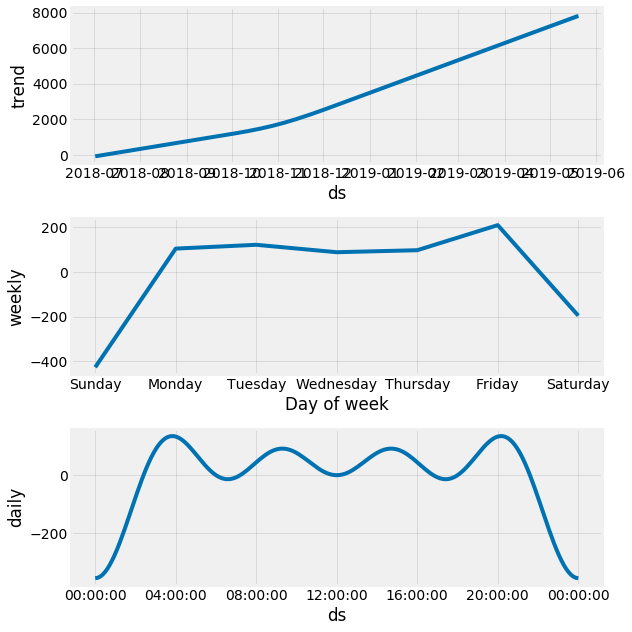

In [18]:
m1.plot_components(forecast1);

## Holiday effect

In [19]:
articles = pd.DataFrame({
  'holiday': 'Article_Published',
  'ds': pd.to_datetime(['2018-07-02', '2018-07-06', '2018-07-08',
                        '2018-07-09', '2018-07-12', '2018-07-19', '2018-07-26', '2018-07-31',
                        '2018-08-06', '2018-08-15', '2018-07-19', '2018-08-26', '2018-08-31',
                        '2018-09-01', '2018-09-04', '2018-09-11', '2018-09-17', '2018-09-23',
                        '2018-10-02', '2018-10-09', '2018-10-18', '2018-10-19', '2018-10-26',
                        '2018-11-02', '2018-11-08', '2018-11-24', '2018-12-05', '2018-12-13',
                        '2018-12-19', '2018-12-24', '2018-12-27', '2019-01-08', '2019-01-11',
                        '2019-01-22', '2019-01-24', '2019-01-28', '2019-02-01', '2019-02-04',
                        '2019-02-07', '2019-02-12', '2019-02-15', '2019-02-21', '2019-03-03',
                        '2019-03-07', '2019-03-12', '2019-03-18', '2019-03-23' ]),
  'lower_window': 0,
  'upper_window': 5,
})
articles.head()

,holiday,ds,lower_window,upper_window
0,Article_Published,2018-07-02,0,5
1,Article_Published,2018-07-06,0,5
2,Article_Published,2018-07-08,0,5
3,Article_Published,2018-07-09,0,5
4,Article_Published,2018-07-12,0,5


In [20]:
m2 = Prophet(holidays=articles, daily_seasonality=True).fit(df)


/Users/sulbha/anaconda/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [21]:
future2 = m2.make_future_dataframe(periods=60)
forecast2 = m2.predict(future2)


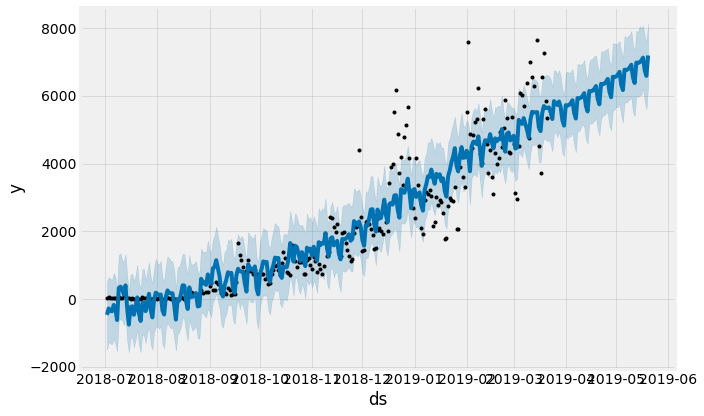

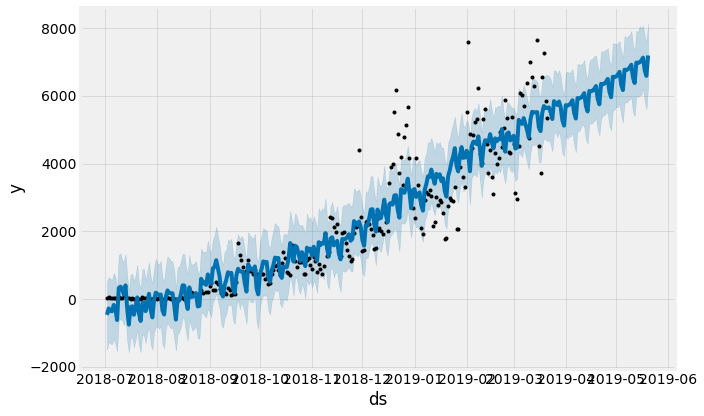

In [22]:
m2.plot(forecast2)

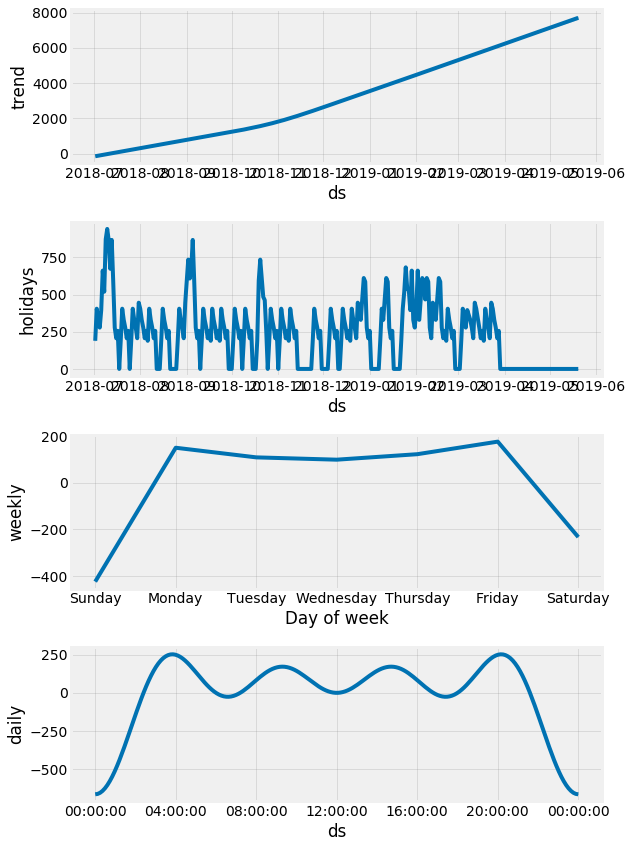

In [23]:
m2.plot_components(forecast2);

In [24]:
# predicting for next 15 days
m3 = Prophet(holidays=articles, mcmc_samples=300).fit(df)
future3 = m3.make_future_dataframe(periods=60)
forecast3 = m3.predict(future3)
forecast3["Views"] = (forecast3.yhat).round()
forecast3["Views_lower"] = (forecast3.yhat_lower).round()
forecast3["Views_upper"] = (forecast3.yhat_upper).round()
forecast3[(forecast3.ds > "3-22-2019") &
          (forecast3.ds < "4-07-2019")][["ds","Views_lower",
                                        "Views", "Views_upper"]]

/Users/sulbha/anaconda/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,Views_lower,Views,Views_upper
262,2019-03-23,4618.0,5662.0,6714.0
263,2019-03-24,4515.0,5483.0,6476.0
264,2019-03-25,4973.0,6002.0,7015.0
265,2019-03-26,4928.0,5941.0,6937.0
266,2019-03-27,4868.0,5905.0,6945.0
267,2019-03-28,4946.0,6018.0,7042.0
268,2019-03-29,4805.0,5866.0,6941.0
269,2019-03-30,4506.0,5480.0,6491.0
270,2019-03-31,4361.0,5327.0,6319.0
271,2019-04-01,4864.0,5924.0,6937.0


In [25]:
# save to excel
forecast3.to_excel("predict_view.xlsx")